## About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

## Business Problem

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

## Dataset

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

    Show_id: Unique ID for every Movie / Tv Show
    Type: Identifier - A Movie or TV Show
    Title: Title of the Movie / Tv Show
    Director: Director of the Movie
    Cast: Actors involved in the movie/show
    Country: Country where the movie/show was produced
    Date_added: Date it was added on Netflix
    Release_year: Actual Release year of the movie/show
    Rating: TV Rating of the movie/show
    Duration: Total Duration - in minutes or number of seasons
    Listed_in: Genre
    Description: The summary description

## Hints

- The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
- Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
- Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
- Start by exploring a few questions: 
    1. What type of content is available in different countries?
    2. How has the number of movies released per year changed over the last 20-30 years?
    3. Comparison of tv shows vs. movies.
    4. What is the best time to launch a TV show?
    5. Analysis of actors/directors of different types of shows/movies.
    6. Does Netflix has more focus on TV Shows than movies in recent years
    7. Understanding what content is available in different countries

## Solution

### Reading data and analyzing basic metrics

In [329]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [332]:
print(df.info())

print("\ncheck if 'show_id' is unique and non-null")
print(df['show_id'].nunique() == df['show_id'].size) #True

print("\ncheck if 'title' is unique and non-null")
print(df['title'].nunique() == df['title'].size) #True

print("\nconfirm different types of shows")
print(df['type'].unique()) #['Movie' 'TV Show']

print("\ncheck possible values for 'rating' for movies and TV shows")
print(df.groupby('type')['rating'].value_counts())

print("\ncheck possible values for 'duration' for movies and TV shows")
df.groupby('type')['duration'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

check if 'show_id' is unique and non-null
True

check if 'title' i

type     duration  
Movie    90 min        152
         93 min        146
         94 min        146
         97 min        146
         91 min        144
                      ... 
TV Show  13 Seasons      3
         11 Seasons      2
         12 Seasons      2
         15 Seasons      2
         17 Seasons      1
Name: duration, Length: 220, dtype: int64

**Observations**
* We see that dataset has 8807 entries. The data set doesn't have any continuous variables.
* Both 'show_id' and 'title' columns are unique and non-null, and therefore either of them can be used as index during merge operations. We will be using 'show_id' in this analysis as titles can have potential duplicates when new data is sourced. 
* 'director', 'cast', 'country', 'date_added', 'release_year', 'rating' and 'duration' columns have null values which we may need to handle as necessary.
* 'type' column has 2 possible values;  'Movie' and 'TV Show'. This can be converted to a categorical variable if needed.
* 'rating' column seems to have 14 possible values. There are 3 records which seem to have incorrect ratings data (66 min,  74 min, 84 min). We will replace these bad values with empty string. 
* 'date_added' column has some missing values and is of type object. We can convert it to 'datetime64' type for easier date time comparison (see below)
* duration column has values in two different formats. For movies, it is of the form 'dd mins'. For 'TV shows', it is of the form 'Season nn'. Since both of them are of different scale, we will not convert it  into numeric type. However, we can remove 'min' and 'season' words from the value and convert them into numeric values when dealing with 'TV shows' or 'Movies' indepedently.  
* 'director', 'cast', 'country' and 'listed_in' are multi-valued columns. (see section on handling multi-valued columns below)


### Data cleaning, conversion and handling missing values

In [347]:
#replace null values with appropriate empty/zero values
df['director'].fillna('', inplace=True) 
df['cast'].fillna('', inplace=True)
df['country'].fillna('', inplace=True) 
df['rating'].fillna('', inplace=True)
df['duration'].fillna('0', inplace=True) 

#convert date_added to datetime64 type
df['date_added'] = df['date_added'].astype('datetime64')

#process duration column
import re
regx = re.compile(r'^(\D*)(\d*)(\D*)$')
df['duration'] = df['duration'].apply(lambda x: re.sub(regx, r'\2', x))

#replace bad rating values with empty string
df[df['rating'].str.contains('min')] = ''

### Handling multi-valued columns

The dataset contains four multi-valued columns;'director', 'cast', 'country' and 'listed_in'. We create four new dataframes-df_directors, df_casts, df_countries and df_listedin respectively-corresponding to each of the multivalued columns. In order to create create a new dataframe for a given multi-valued column '<mv_col>', we first split it into columns containing individual values. We then use stack function to stack those columns into index. We then convert the series to dataframe, reset its index, rename the new column to appropriate name, and finally merge the new dataframe with the original dataframe. Finally, we also create a new dataframe (df_combined) which combines all four new dataframes into one.

In [349]:

# For each multi-valued column '<mv_col>' (i.e. country, cast, director and genre) 
# 1. we split '<mv_col>' into the individual values (converting to lower case and striping any leading/trailing spaces)
# 2. create a temp dataframe from the split values, stacking them together,and then re_indexing and renaming newly stacked column to get a new column '<mv_col2>'
# 3. merge original dataframe with temp dataframe created above on 'show_id' column
rindex = df['show_id']

# process 'country' multivalued column
countries_list = df['country'].apply(lambda x:[i.strip().lower() for i in str(x).split(',')]).tolist()
temp = pd.DataFrame(countries_list, index = rindex).stack().to_frame().reset_index().rename(columns={0: 'country2'})
df_countries = df.merge(temp, on='show_id') #10850 rows x 15 columns
print(f'df_countries created. shape: {df_countries.index.size} rows, {df_countries.columns.size} columns')

# process 'cast' multivalued column
cast_list = df['cast'].apply(lambda x:[i.strip().lower() for i in str(x).split(',')]).tolist()
temp = pd.DataFrame(cast_list, index = rindex).stack().to_frame().reset_index().rename(columns={0: 'cast2'})
df_casts = df.merge(temp, on='show_id') 
print(f'df_casts created. shape: {df_casts.index.size} rows, {df_casts.columns.size} columns')

# process 'director' multivalued column
director_list = df['director'].apply(lambda x:[i.strip().lower() for i in str(x).split(',')]).tolist()
temp = pd.DataFrame(director_list, index = rindex).stack().to_frame().reset_index().rename(columns={0: 'director2'})
df_directors = df.merge(temp, on='show_id') 
print(f'df_directors created. shape: {df_directors.index.size} rows, {df_directors.columns.size} columns')

# process 'listed_in' multivalued column
director_list = df['listed_in'].apply(lambda x:[i.strip().lower() for i in str(x).split(',')]).tolist()
temp = pd.DataFrame(director_list, index = rindex).stack().to_frame().reset_index().rename(columns={0: 'listed_in2'})
df_listedin = df.merge(temp, on='show_id') 
print(f'df_listedin created. shape: {df_listedin.index.size} rows, {df_listedin.columns.size} columns')

#combine all 4 into a single one
df_combined = (df_countries
               .merge(df_casts[['show_id', 'cast2']], on='show_id')
               .merge(df_directors[['show_id', 'director2']], on='show_id')
               .merge(df_listedin[['show_id', 'listed_in2']], on='show_id'))
print(f'df_combined created. shape: {df_combined.index.size} rows, {df_combined.columns.size} columns')


df_countries created. shape: 10856 rows, 14 columns
df_casts created. shape: 64957 rows, 14 columns
df_directors created. shape: 9618 rows, 14 columns
df_listedin created. shape: 19329 rows, 14 columns
df_combined created. shape: 208623 rows, 17 columns


### Data Exploration

**1. Find largest markets (countries) for Netflix**

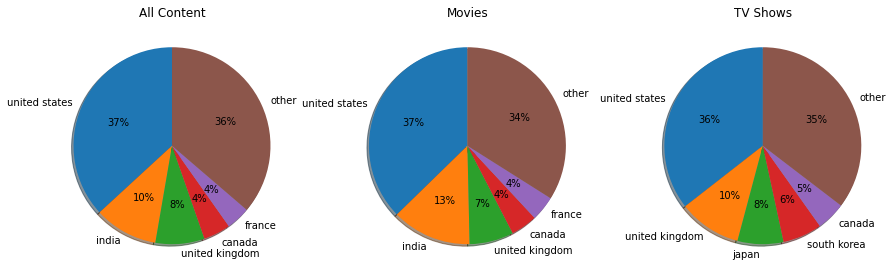

In [423]:
import matplotlib.pyplot as plt

#find top 5 countries by overall content
df_countries_filtered = df_countries[df_countries['country2'] != '']

data = df_countries_filtered.groupby('country2')['show_id'].agg(lambda s: s.unique().size).sort_values(ascending=False)
pie_data_all = np.concatenate([data.iloc[0:5].values, np.array([data.iloc[5:].sum()])])
labels_all = data.index[0:5].values.tolist() + ['other']

df_countries_filtered = df_countries[(df_countries['country2'] != '') & (df_countries['type'] == 'Movie')]
data = df_countries_filtered.groupby('country2')['show_id'].agg(lambda s: s.unique().size).sort_values(ascending=False)
pie_data_movies = np.concatenate([data.iloc[0:5].values, np.array([data.iloc[5:].sum()])])
labels_movies = data.index[0:5].values.tolist() + ['other']

df_countries_filtered = df_countries[(df_countries['country2'] != '') & (df_countries['type'] == 'TV Show')]
data = df_countries_filtered.groupby('country2')['show_id'].agg(lambda s: s.unique().size).sort_values(ascending=False)
pie_data_shows = np.concatenate([data.iloc[0:5].values, np.array([data.iloc[5:].sum()])])
labels_shows = data.index[0:5].values.tolist() + ['other']

fig, ax = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (15,15)

ax[0].title.set_text('All Content')
ax[0].pie(pie_data_all,
       labels= labels_all,       
       startangle=90,
       shadow=True,
       autopct='%1.0f%%'
       )

ax[1].title.set_text('Movies')
ax[1].pie(pie_data_movies,
       labels= labels_movies,       
       startangle=90,
       shadow=True,
       autopct='%1.0f%%'
       )

ax[2].title.set_text('TV Shows')
ax[2].pie(pie_data_shows,
       labels=labels_shows,       
       startangle=90,
       shadow=True,
       autopct='%1.0f%%'
       )

plt.show()


**observation**

- USA, India and UK are largest Netflix markets constituting around 55% market share.
- USA, India and UK are largest Netflix markets for 'movies' constituting around 57% market share.
- However when it comes to TV shows, India does not feature in top 5 markets. This may indicate potential for promoting TV show contents more in Indian market.

**2. How has the number of movies released per year changed over the last 20-30 years?**

release_year ranges from 1925 to 2021


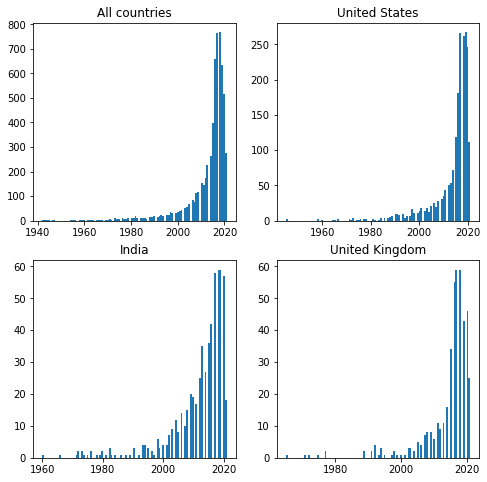

In [619]:
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta

df['release_year'].describe()
print('release_year ranges from 1925 to 2021')

release_year_all = df[(df['release_year'] != '') & (df['type'] == 'Movie')]['release_year'].astype('int')
release_year_usa = df_countries[(df_countries['country2'] == 'united states') & (df_countries['release_year'] != '')  & (df['type'] == 'Movie')]['release_year'].astype(int)
release_year_india = df_countries[(df_countries['country2'] == 'india') & (df_countries['release_year'] != '')  & (df['type'] == 'Movie')]['release_year'].astype(int)
release_year_uk = df_countries[(df_countries['country2'] == 'united kingdom') & (df_countries['release_year'] != '')  & (df['type'] == 'Movie')]['release_year'].astype(int)

fig2, ax2 = plt.subplots(2, 2)
plt.rcParams["figure.figsize"] = (4,4)

ax2[0][0].title.set_text('All countries')
ax2[0][0].hist(release_year_all, bins=100)

ax2[0][1].title.set_text('United States')
ax2[0][1].hist(release_year_usa, bins=100)

ax2[1][0].title.set_text('India')
ax2[1][0].hist(release_year_india, bins=100)

ax2[1][1].title.set_text('United Kingdom')
ax2[1][1].hist(release_year_uk, bins=100)

plt.show()


**observations**
- We observe that frequency distributions for movies released globally as well as for individual countries are negatively skewed with most movies release dates falling between 2010 and 2020. 
- For USA, we observe that higher number of movie release dates lie between 2014-2020, which indicates tendency of USA consumers to watch more recent content. Based on this, Netflix can consider listing movies released in last 6 years for USA consumers.
- For India as well, peak lies in the range 2014-2020. However, considerable movies also lie in the range 2000-2014 (compared with USA). This indicates that Indian consumers are likely to also watch 15-20 year old movies. In other words, for Indian market, Netflix can consider listing movies released in last 20 years. 

**3. Average movie runtime**

In [489]:
runtimes = df_countries[(df_countries['duration'] != '') & (df_countries['type'] == 'Movie')].groupby('country2')['duration'].agg(lambda x: x.astype('int').mean()).sort_values()

print(f"Average global movie runtime is: {df[(df['type'] == 'Movie') & (df['duration'] != '')]['duration'].astype('int').mean()}")
print(f"Average movie runtime in USA is: {runtimes['united states']}")
print(f"Average movie runtime in India is: {runtimes['india']}")
print(f"Average movie runtime in UK is: {runtimes['united kingdom']}")


Average global movie runtime is: 99.57718668407311
Average movie runtime in USA is: 93.75372862859221
Average movie runtime in India is: 125.91268191268192
Average movie runtime in UK is: 98.76029962546816


**observations**

- Customers in USA and UK watch shorter length movies (94 and 99 mins avg movie runtime respectively)
- Indian customers prefer longer duration movies (avg runtime 125 mins i.e > 2 hours)

**4. Rating distribution of movies**

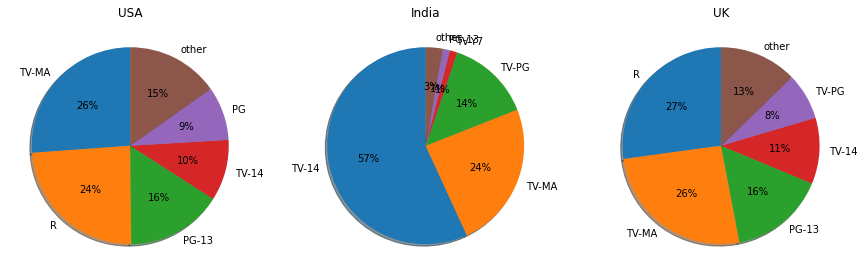

In [615]:
rating_by_country = df_countries[(df_countries['type'] == 'Movie') & (df_countries['country2'] != '') & (df_countries['rating'] != '')].groupby(['country2', 'rating']).count()

#rating distribution for usa
data = rating_by_country.loc['united states'].sort_values(by='show_id', ascending=False)['show_id']
pie_data_usa = np.concatenate([data.iloc[0:5].values, np.array([data.iloc[5:].sum()])])
labels_usa = data.index[0:5].values.tolist() + ['other']

#rating distribution for india
data = rating_by_country.loc['india'].sort_values(by='show_id', ascending=False)['show_id']
pie_data_india = np.concatenate([data.iloc[0:5].values, np.array([data.iloc[5:].sum()])])
labels_india = data.index[0:5].values.tolist() + ['other']

#rating distribution for uk
data = rating_by_country.loc['united kingdom'].sort_values(by='show_id', ascending=False)['show_id']
pie_data_uk = np.concatenate([data.iloc[0:5].values, np.array([data.iloc[5:].sum()])])
labels_uk = data.index[0:5].values.tolist() + ['other']


fig, ax = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (15,15)

ax[0].title.set_text('USA')
ax[0].pie(pie_data_usa,
       labels= labels_usa,       
       startangle=90,
       shadow=True,
       autopct='%1.0f%%'
       )

ax[1].title.set_text('India')
ax[1].pie(pie_data_india,
       labels=labels_india,       
       startangle=90,
       shadow=True,
       autopct='%1.0f%%'
       )

ax[2].title.set_text('UK')
ax[2].pie(pie_data_uk,
       labels= labels_uk,       
       startangle=90,
       shadow=True,
       autopct='%1.0f%%'
       )


plt.show()


**Observations**
- Share of 'TV-MA' rating movies across 3 countries is similar (around 25%)
- In US and UK, 'R' rated movies also contribute to around 25% of movie market share, while TV-14 contributing around 10%
- India, on the other hand, has negligible consumption of 'R' rated movies and a very large share of 'TV-14' rated movies (57%).

**5. What is the best time to launch a TV show?**

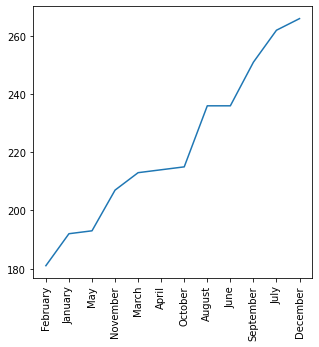

In [536]:
data = df[(df['type'] == 'TV Show') & (df['date_added'] != '')]['date_added'].dt.month_name().value_counts().sort_values()

plt.rcParams["figure.figsize"] = (5,5)
plt.xticks(rotation = 90)
plt.plot(data)
plt.show()

**Observations**

- Best months to launch a new TV show are December, July, September, June and August in that order.

**6. Analysis of prolific movie actors per countries (last 5 years)**

In [612]:
from datetime import datetime

latest_dt = df['date_added'].max()
five_years_ago = latest_dt.year - 5

df_cast_countries = df_countries[['show_id','country2']].merge(df_casts,on='show_id')
df_cast_countries['release_year'] = df_cast_countries[df_cast_countries['release_year'] != '']['release_year'].astype('int')

country_cast_data = df_cast_countries[(
    df_cast_countries['type'] == 'Movie') & 
    (df_cast_countries['cast2'] != '') & 
    (df_cast_countries['country2'] != '') &      
    (df_cast_countries['release_year'] >= five_years_ago)].groupby(['country2', 'cast2']).count()

data_india = country_cast_data.loc['india']['show_id'].sort_values(ascending=False)
print(f'top 5 prolific actors in India: {data_india[:5].index.tolist()}')
data_usa = country_cast_data.loc['united states']['show_id'].sort_values(ascending=False)
print(f'top 5 prolific actors in USA: {data_usa[:5].index.tolist()}')
data_uk = country_cast_data.loc['united kingdom']['show_id'].sort_values(ascending=False)
print(f'top 5 prolific actors in UK: {data_uk[:5].index.tolist()}')


top 5 prolific actors in India: ['nawazuddin siddiqui', 'adil hussain', 'pankaj tripathi', 'karamjit anmol', 'rajkummar rao']
top 5 prolific actors in USA: ['adam sandler', 'tiffany haddish', 'tara strong', 'woody harrelson', 'fred armisen']
top 5 prolific actors in UK: ['james cosmo', 'ricky gervais', 'lily james', 'michael mcelhatton', 'eddie marsan']


**Observations**
- The results above show most prolific actors per countries in last 5 years. Since we don't really know the total number of movies these actors features in, it's difficult to derive any insights from it. But if we can treat number of movies as an indirect indication of an actor's popularity, then listing movies featuring one of the top 5 actors in that region may be a benefial decision for Netflix. 

**7. Analysis of prolific movie directors per countries**

In [613]:
from datetime import datetime

latest_dt = df['date_added'].max()
five_years_ago = latest_dt.year - 5

df_director_countries = df_countries[['show_id','country2']].merge(df_directors,on='show_id')
df_director_countries['release_year'] = df_director_countries[df_director_countries['release_year'] != '']['release_year'].astype('int')

country_director_data = df_director_countries[(
    df_director_countries['type'] == 'Movie') & 
    (df_director_countries['director2'] != '') & 
    (df_director_countries['country2'] != '') &      
    (df_director_countries['release_year'] >= five_years_ago)].groupby(['country2', 'director2']).count()

data_india = country_director_data.loc['india']['show_id'].sort_values(ascending=False)
print(f'top 5 prolific actors in India: {data_india[:5].index.tolist()}')
data_usa = country_director_data.loc['united states']['show_id'].sort_values(ascending=False)
print(f'top 5 prolific actors in USA: {data_usa[:5].index.tolist()}')
data_uk = country_director_data.loc['united kingdom']['show_id'].sort_values(ascending=False)
print(f'top 5 prolific actors in UK: {data_uk[:5].index.tolist()}')


top 5 prolific actors in India: ['anurag kashyap', 'mahesh manjrekar', 'anurag basu', 'ashutosh gowariker', 'dibakar banerjee']
top 5 prolific actors in USA: ['marcus raboy', 'jay karas', 'don michael paul', 'ryan polito', 'troy miller']
top 5 prolific actors in UK: ['edward cotterill', 'vince marcello', 'blair simmons', 'ross boyask', 'benjamin turner']


**Observations**
- The results above show most prolific directors per countries. Since we don't really know the total number of movies these directors have directed, it's difficult to derive any insights around it. But if we can treat number of movies as an indirect indication of a director's success, then listing movies by one of the top 5 directors in that region may be a benefial decision for Netflix. 

**8. Genre distribution of movies**

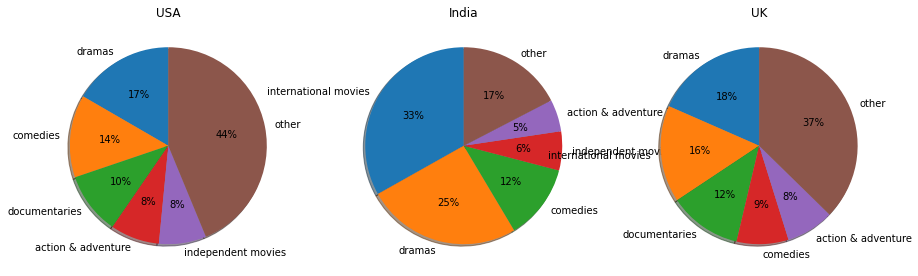

In [617]:
df_genre_countries = df_countries[['show_id','country2']].merge(df_listedin ,on='show_id')

genre_by_country = df_genre_countries[
    (df_genre_countries['type'] == 'Movie') & 
    (df_genre_countries['country2'] != '') & 
    (df_genre_countries['listed_in2'] != '')].groupby(['country2', 'listed_in2']).count()

data = genre_by_country.loc['united states'].sort_values(by='show_id', ascending=False)['show_id']
pie_data_usa = np.concatenate([data.iloc[0:5].values, np.array([data.iloc[5:].sum()])])
labels_usa = data.index[0:5].values.tolist() + ['other']

data = genre_by_country.loc['india'].sort_values(by='show_id', ascending=False)['show_id']
pie_data_india = np.concatenate([data.iloc[0:5].values, np.array([data.iloc[5:].sum()])])
labels_india = data.index[0:5].values.tolist() + ['other']

data = genre_by_country.loc['united kingdom'].sort_values(by='show_id', ascending=False)['show_id']
pie_data_uk = np.concatenate([data.iloc[0:5].values, np.array([data.iloc[5:].sum()])])
labels_uk = data.index[0:5].values.tolist() + ['other']

fig, ax = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (15,15)

ax[0].title.set_text('USA')
ax[0].pie(pie_data_usa,
       labels= labels_usa,       
       startangle=90,
       shadow=True,
       autopct='%1.0f%%'
       )

ax[1].title.set_text('India')
ax[1].pie(pie_data_india,
       labels=labels_india,       
       startangle=90,
       shadow=True,
       autopct='%1.0f%%'
       )

ax[2].title.set_text('UK')
ax[2].pie(pie_data_uk,
       labels= labels_uk,       
       startangle=90,
       shadow=True,
       autopct='%1.0f%%'
       )


plt.show()


**Observations**
- 'Drama' and 'comedies' are top two genres in USA
- 'Drama' and 'Independent Movies' are top two genres in UK
- 'International movies' and 'dramas' followed by 'comedies' are top genres in India

### Insights and Business